# Tracking the Growth of COVID-19 Cases

The purpose of this notebook is to display the 7 day rolling average of confirmed cases of COVID-19 in various locations in the US.

**The notebook pulls data from the Johns Hopkins [Data Repository](https://github.com/CSSEGISandData/COVID-19) of global Coronavirus COVID-19 cases**, and then does the following things:

- Gives the data in a series of grid views (Country, State, County)
- Gives the data in a series of charts (scroll to bottom)


## Important Caveats:

- The confirmed cases are not the number of infections in each country, only those that have tested positive.


In [1]:
# **** NOTE: THIS RUNS ON PYTHON 3.7 ****
%run covid_base.py "California" "Los Angeles"

Today's date: 2020-09-30 17:00:09.385661


## Global COVID-19 Analysis

In [2]:
principality = 'Country/Region'
cases, ds = get_cases_ds(principality, dfGlobalConfirmed, dfGlobalDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, dfGlobalConfirmed, dfGlobalDeaths)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/29/20


,9/29/20 cases,Deaths,Death_rate_pct
Country/Region,,,
US,7190230,205986,2.86
Brazil,4777522,142921,2.99
India,6225763,97497,1.57
Mexico,738163,77163,10.45
United Kingdom,448729,42162,9.40
Italy,313011,35875,11.46
Peru,808714,32324,4.00


## COVID-19 Country-by-Country Format for Further Analysis

In [3]:
casegrouped = cases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(casegrouped, principality, caseName)

dsgrouped = ds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(dsgrouped, principality, dName)

countryData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed US cases as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countryDataTA = dfLocale(countryData, principality, localeName='US')
countryDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed US cases as of 9/29/20


,Country/Region,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
43593,US,7115008,2020-09-27,204756.0,266.0,36919.0,44313.428571
43592,US,7078089,2020-09-26,204490.0,740.0,45377.0,44281.428571
43591,US,7032712,2020-09-25,203750.0,952.0,55054.0,44111.285714
43590,US,6977658,2020-09-24,202798.0,914.0,44110.0,43188.571429
43589,US,6933548,2020-09-23,201884.0,1098.0,37630.0,43277.714286
43588,US,6895918,2020-09-22,200786.0,921.0,39034.0,43333.428571
43587,US,6856884,2020-09-21,199865.0,356.0,52070.0,43318.857143


## US State-by-State COVID-19 Analysis

In [4]:
principality = 'Province_State'
uscases, usds = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, uscases, usds)
print('\nTotal number of cases as of', mostrecentdatecases)
casessummary


Total number of cases as of 9/29/20


,9/29/20 cases,Deaths,Death_rate_pct
Province_State,,,
New York,457649,33144.0,7.24
New Jersey,204563,16117.0,7.88
Texas,767264,15902.0,2.07
California,815654,15782.0,1.93
Florida,704568,14143.0,2.01
Massachusetts,131584,9423.0,7.16
Illinois,293448,8881.0,3.03


## COVID-19 State-by-State Format for Further Analysis

In [5]:
uscasegrouped = uscases.groupby(principality).sum().reset_index()
mc = melt_dataframes_date(uscasegrouped, principality, caseName)

usdsgrouped = usds.groupby(principality).sum().reset_index()
md = melt_dataframes_date(usdsgrouped, principality, dName)

stateData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' COVID-19 cases and deaths by county as of', mostrecentdatecases)

#stateData
stateDataTA = dfLocale(stateData, principality, localeName=home_state)
stateDataTA.sort_values(by='date', ascending=False)[:7]


Number of confirmed California COVID-19 cases and deaths by county as of 9/29/20


,Province_State,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
1509,California,809890,2020-09-27,15606.0,23.0,2439.0,3388.857143
1508,California,807451,2020-09-26,15583.0,67.0,3791.0,3448.285714
1507,California,803660,2020-09-25,15516.0,123.0,4144.0,3452.714286
1506,California,799516,2020-09-24,15393.0,102.0,3080.0,3497.000000
1505,California,796436,2020-09-23,15291.0,102.0,3371.0,3587.857143
1504,California,793065,2020-09-22,15189.0,133.0,2969.0,3551.571429
1503,California,790096,2020-09-21,15056.0,40.0,3928.0,3566.000000


## County-by-County COVID-19 Analysis 

In [6]:
principality = 'County'
stateCases, stateDs = get_cases_ds(principality, dfUSConfirmed, dfUSDeaths)

casessummary, mostrecentdatecases = get_cases_summary(principality, stateCases, stateDs)
print('\nNumber of confirmed ' + home_state + ' cases as of', mostrecentdatecases)
casessummary



Number of confirmed California cases as of 9/29/20


,9/29/20 cases,Deaths,Death_rate_pct
County,,,
Los Angeles,269284,6551.0,2.43
Orange,53557,1249.0,2.33
Riverside,59173,1216.0,2.05
San Bernardino,54849,952.0,1.74
San Diego,46985,781.0,1.66
San Joaquin,20357,447.0,2.20
Sacramento,22438,412.0,1.84


## COVID-19 County-by-County Format for Further Analysis

In [7]:
mc = melt_dataframes_date(stateCases, principality, caseName)
md = melt_dataframes_date(stateDs, principality, dName)

countyData = get_joined_melted_cases_deaths(mc, md, principality)

print('\nNumber of confirmed ' + home_state + ' cases by county as of', mostrecentdatecases)
#print('\nNote: if the number of current deaths (high and close) are 0, the dates here will not display')

countyData
countyDataTA = dfLocale(countyData, principality, localeName=home_county)
countyDataTA.sort_values(by='date', ascending=False)[:11]


Number of confirmed California cases by county as of 9/29/20


,County,Cases,date,Deaths,DeathsDiff,CaseDiff,Rolling7Average
4785,Los Angeles,267801,2020-09-27,6514.0,10.0,813.0,1000.571429
4784,Los Angeles,266988,2020-09-26,6504.0,16.0,1213.0,1024.428571
4783,Los Angeles,265775,2020-09-25,6488.0,33.0,1361.0,1037.000000
4782,Los Angeles,264414,2020-09-24,6455.0,32.0,1081.0,1020.428571
4781,Los Angeles,263333,2020-09-23,6423.0,22.0,1200.0,1026.428571
4780,Los Angeles,262133,2020-09-22,6401.0,35.0,687.0,1012.000000
4779,Los Angeles,261446,2020-09-21,6366.0,13.0,649.0,970.000000
4778,Los Angeles,260797,2020-09-20,6353.0,23.0,980.0,973.142857
4777,Los Angeles,259817,2020-09-19,6330.0,0.0,1301.0,948.714286
4776,Los Angeles,258516,2020-09-18,6330.0,6.0,1245.0,921.428571



7 day new US cases as of 9/29/20


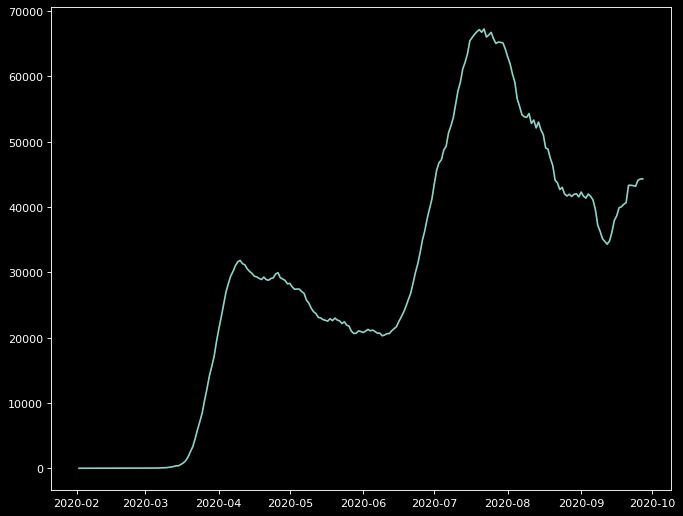

In [8]:
print('\n7 day new US cases as of', mostrecentdatecases)

countryDataTA.index = countryDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countryDataTA["Rolling7Average"])
plt.show()



7 day average new California cases as of 9/29/20


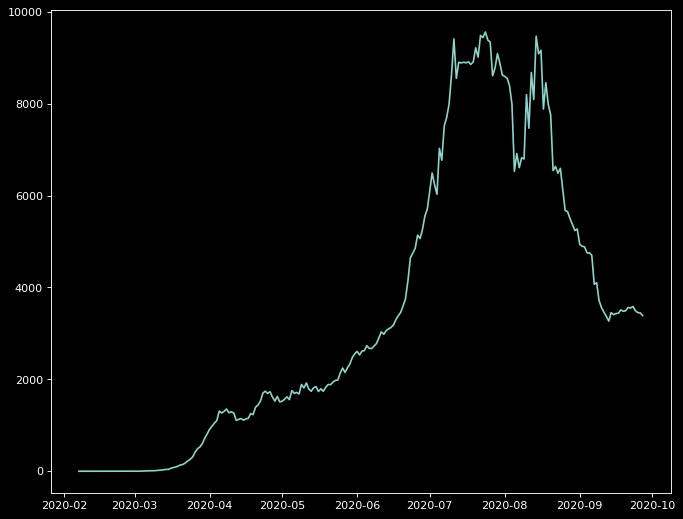

In [9]:
print('\n7 day average new ' + home_state + ' cases as of', mostrecentdatecases)

stateDataTA.index = stateDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(stateDataTA["Rolling7Average"])
plt.show()



7 day average new Los Angeles cases as of 9/29/20


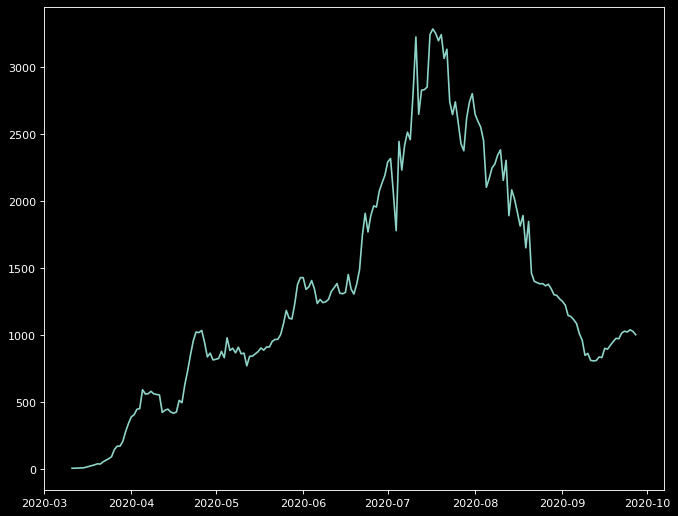

In [10]:
print('\n7 day average new ' + home_county + ' cases as of', mostrecentdatecases)

countyDataTA.index = countyDataTA["date"]
with plt.style.context('dark_background'):
    plt.figure(num=None, figsize=(10, 8), dpi=80)
    plt.plot(countyDataTA["Rolling7Average"])
plt.show()